PHAS0029 Session C2:  Histograms and normal distributions
   
_Updated: 12/01/2022_

## Intended learning outcomes:
<p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</ul>

## Getting started

As last time, the first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience. This has been pre-filled for you so you just need to run the cell below.

In [1]:
# The following line makes all plot output generate as images within the notebook. 
# This command should precede the import pyplot line
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# See the discussion below for when you might want to uncomment this line.
#plt.rcParams["patch.force_edgecolor"] = True

# **Task 1**: Importing and plotting data
<div class="alert alert-success"> 

Create a simple function called <tt> load_data</tt> that uses `np.loadtxt` to import the contents of a .txt file into a numpy array. Your function should take name of the data file as an input and return both the data and the number of data points loaded. 

The script below your function definition is going to import some data from a text file called <tt>sampledata.txt</tt> into an array using your function. The file contains a single column of numbers representing the results of a series of measurements of the same quantity.
    
Hint: If using outside of CoCalc you need to make sure you've downloaded the file <tt>sampledata.txt</tt> from the main directory, and that it is saved in the <b>same directory/folder as this notebook</b>. You can check this is the case in CoCalc by navigating to the assignment folder. 

</div>

In [2]:
def load_data(datafile):
    
    '''
    This function loads and imports the contents of a string variable into a numpy array and returns both the data and the number of data points loaded. 
    
    Input: datafile (string)
    Output: data (string), lengthdata (integer) 

    '''
    #importing the contents of 'datafile' and storing it in a numpy array called data
    data = np.loadtxt(datafile)
    
    #calculating the number of data points in 'data'
    lengthdata = len(data)
    
    #returning data and its number of data points
    return data, lengthdata
    
your_loaded_data,your_no_points=load_data('sampledata.txt')
print("data is: \n", your_loaded_data)
print("There are ", your_no_points, "data points")

data is: 
 [ 9.08784134 10.10662555 10.6043289   8.14670094 11.21532998 10.09371284
 10.4268221   9.512998    8.62930223  7.48937559 10.65366662 10.82957068
  8.78448663 10.9601158   9.90659032  9.1582816  10.44614588  8.83495279
 11.08507526 10.74786111 10.3768063   9.94925924 10.98840191  8.1845716
 11.11626203  9.93193642  8.24589252  9.60070141  9.59625026  8.75870124
 10.26599281 10.03072825  9.17414148 10.95249503  9.81645277  7.87208683
  9.59434022  9.22794451  8.60092591 11.04193271 10.55787516  9.75736188
  9.96894073 10.35909125  9.08197603  9.60704288 11.83643996 10.65500473
  9.55931389 11.79449148 11.52681481 11.22729724 10.86988402  9.84875052
 10.05911294 10.2443348   9.78448166 10.18996261  8.85726152 11.40313014
  9.30652172 10.15578731 10.89652947  9.37932207  9.60507078 10.38731808
  8.91990775  9.15388917 10.91798911  8.96221918  8.03327801 10.45508301
  7.76131074 10.03609924  9.5262954   9.14885299 10.25739095  9.89103726
  8.63909939 10.36168981  9.92134822 10.0

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the nextcell to check if your function <tt>load_data</tt> works correctly. 
    </div>

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)#turn off deprecation warnings
#check if function exists
assert "load_data" in dir(), 'Make sure you define your function and use the specified function name.'
#check output format of function
outputst=load_data('sampledata.txt')
assert np.size(outputst)==2, 'Make sure your function returns two outputs.'
assert type(outputst[0])==np.ndarray, 'Your data should be loaded into a numpy array and returned first.'
assert outputst[1]==len(outputst[0]), 'Your function should return a length of the data array as the second output.'
#check if calculation within function is correct
print('Well done! All test passed. You can move to the next part of the task.')


Well done! All test passed. You can move to the next part of the task.


If you've successfully imported the data, you should be able to see that the average value is around 10. We can easily calculate the average:

In [4]:
print("The mean of the data is ", np.mean(your_loaded_data))

The mean of the data is  9.793228122766692


## Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

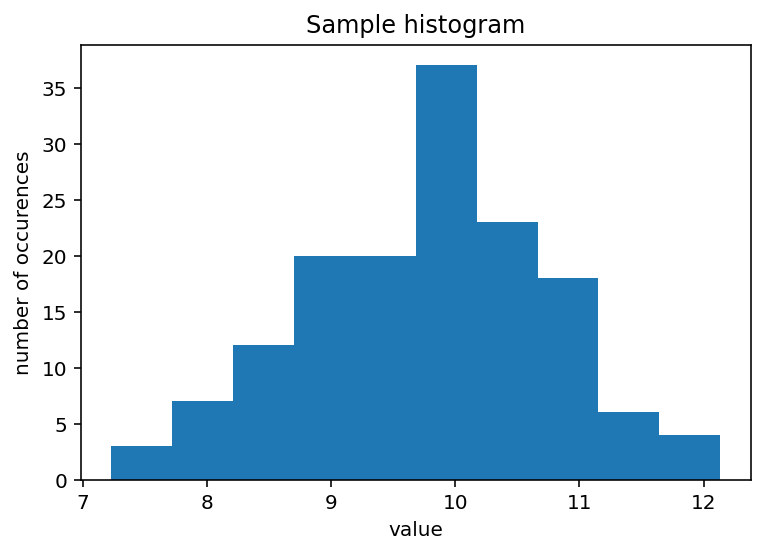

In [5]:
plt.figure()

plt.hist(your_loaded_data)
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("number of occurences");

However, it's often useful to be able to see the outline of the histogram bins, which is turned off by default in Matplotlib. You can do this in one of two ways:

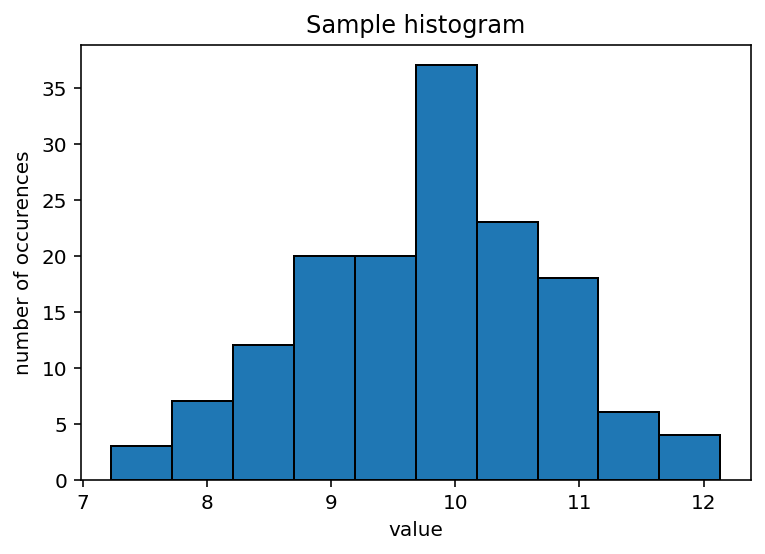

In [6]:
# 1. Include borders explicitly in the plt.hist statement:

plt.figure()
plt.hist(your_loaded_data, edgecolor='black') # you can set the edgecolor to anything, black is probably best
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("number of occurences");

# 2. The following line will globally include borders in all plt.hist (and other bar-type plots) - 
# most useful if you include it in the preamble cell with the import statements 

#plt.rcParams["patch.force_edgecolor"] = True

# Which one you choose to use is up to you!

By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised - in this case the integral of the histogram will be equal to 1. To use this, set the keyword argument `density=True`.

For example, this will sort the data into 15 bins, and normalize the histogram:

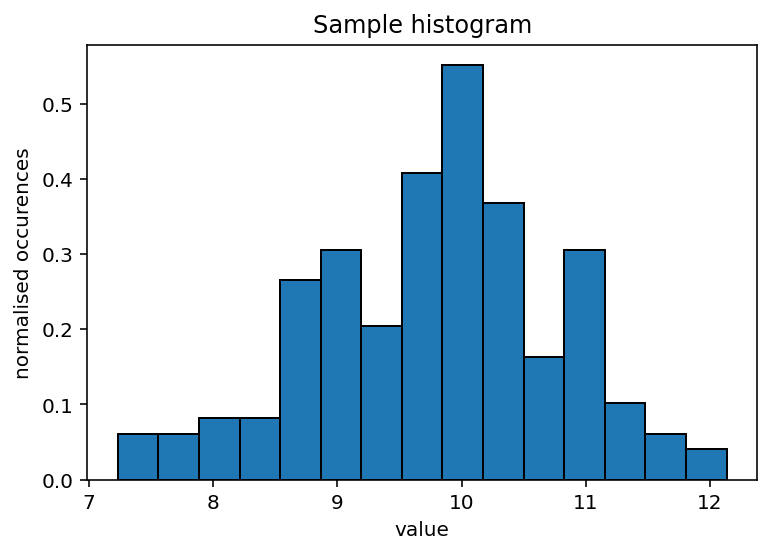

In [7]:
plt.figure()
# 15 bins, normalized:
plt.hist(your_loaded_data,bins=15,density=True,edgecolor='k') # 'k' as abbreviation for black.
plt.title("Sample histogram")
plt.xlabel("value")
plt.ylabel("normalised occurences"); # semicolon at end suppresses unwanted IPython <output>

# **Task 2**: Fitting data to a Gaussian
Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: `scipy.stats`, to find out. (Documentation link: https://docs.scipy.org/doc/scipy/reference/stats.html )

In [8]:
import scipy.stats as stats

Specifically, we'll use `norm.fit` to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [9]:
x0, sigma = stats.norm.fit(your_loaded_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)

Fitted Gaussian: 
 Mean value  9.793228122766692 with standard deviation 0.97432217875081


We can see that we obtain the same mean as we got before from `np.mean()`.
Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is.<br> 


<div class="alert alert-success"> 
<h3> Calculate a Gaussian </h3>

In the cell below, write a function called <tt>gaussian_fn</tt> that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.

Don't forget the docstring!
</div>

In [10]:
def gaussian_fn(x, x0, sigma):
    '''
    This function will calculate and return a gaussian
    Input: x (data values), x0 (mean of data values), sigma (standard deviation of data values)
    Output: y (gaussian values)
    '''
    
    #perfoming the mathematical operations required to calculate the gaussian values
    y0 = 1/(sigma*np.sqrt(2*np.pi))
    
    y1 = (x-x0)**2
    y2 = 2*(sigma**2)
    #gaussian values
    y = y0 * np.exp(-(y1/y2))
    
    #returning the y values of the gaussian
    return y

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your function <tt>gaussian_fn</tt> works correctly. 
    </div>

In [11]:
#check if function exists
assert "gaussian_fn" in dir(), 'Make sure you define your function and use the specified function name.'
testx=np.linspace(1,2,20)
testm,testv=stats.norm.fit(testx)
#check output format of function
outputg=gaussian_fn(testx,testm,testv)
assert type(outputg)==np.ndarray, 'Your output should be a numpy array.'
#check if stats.norm.pdf has been used instead of the equation
from unittest.mock import patch
with patch('scipy.stats.norm.pdf') as inbuilt_gauss:
    gaussian_fn(1, 2,1)
asnwd=inbuilt_gauss.assert_not_called(),'You should build your own function using the equation above. Do not use the in-built function of the scipy package at this stage.'

#check if calculation within function is correct
assert all(outputg==1/(np.sqrt(2*np.pi)*testv) * np.exp(-(testx-testm)**2/(2*testv**2))), 'Your function is returning the wrong values. Check your equation for mistakes and make sure your function arguments are being used.'

print('Well done! All test passed. You can move to the next part of the task.')

Well done! All test passed. You can move to the next part of the task.


# **Task 3**: Generate Gaussian
<div class="alert alert-success">
Now complete the cell below to:
<ol>
    <li>Use np.linspace to create an array <tt> x_data</tt> of 100 ordered, equally spaced, x-values for the fitted line starting at 7 and finishing at 13.</li>
    <li>Use your function to create a corresponding array of y-values <tt>y_data</tt> with a Gaussian form.</li>
</ol>
</div>

In [12]:
#Using np.linspace to create an array of x_data of 100 ordered, equally spaced  x-values for the fitted line starting at 7 and finishing at 13
x_data = np.linspace(7,13,100)

#Using my 'gaussian_fn' function to create an array of y-values with a Gaussian form.
y_data = gaussian_fn(x_data, x0, sigma)

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your code above works correctly. 
    </div>

In [13]:
#check if variables exists
assert ("x_data" in globals())&("y_data" in globals()), 'Make sure you name both arrays correctly.'
assert all(x_data==np.linspace(7,13,100)), 'Recheck your x data.'
testm,testv=stats.norm.fit(your_loaded_data)
assert (x0,sigma)==(testm,testv), 'Do not redefine the mean and standard deviation of the fit (leave x0 and sigma as they were).'
assert all(y_data==gaussian_fn(x_data,testm,testv)), 'Make sure you are using the mean and standard deviation from the fitted Gaussian to calculate the y data.'

print('Well done! All test passed. You can move to the next part of the task.')

Well done! All test passed. You can move to the next part of the task.


The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

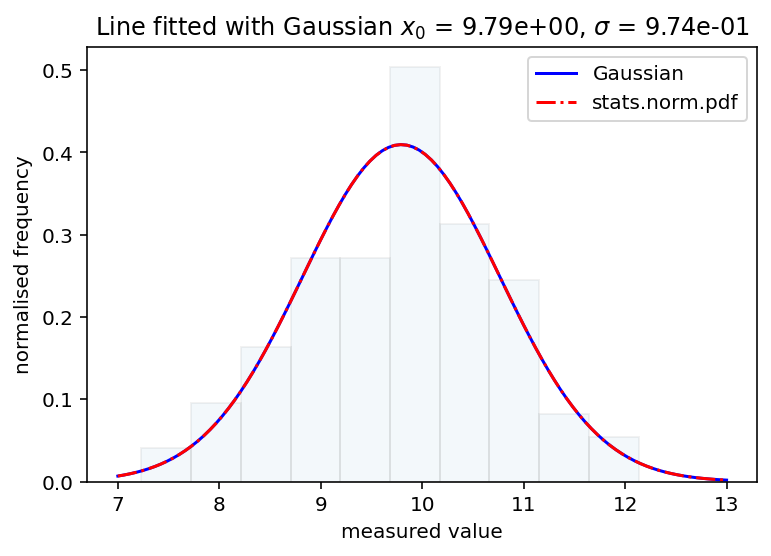

In [14]:
gaussian_check = stats.norm.pdf(x_data,x0,sigma) # see next text cell for explanation

plt.figure()
plt.hist(your_loaded_data, density=True,alpha=0.05,edgecolor='k')
plt.plot(x_data,y_data,'b-', label='Gaussian')
plt.plot(x_data,gaussian_check,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line). If it doesn't, go back and correct your `gaussian_fn` code until it does! 

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

Note also:
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent (to 25%), which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram, or overlaying two histograms.
2. The title of the graph includes the fitted parameters by using a Python f-string. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.

## More about python f-strings for formatting

In PHAS0007 last year we mostly used the .format() structure for formatting numbers in code outputs. [Formatted string literals](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) are very similar, but are actually a bit easier to use, so we'll be using those in PHAS0029. See the separate notebook in the assignment folder, for more information.

# **Task 4**: Adding more data

**More data = a better fit?**

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "[random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)" will generate random numbers with a normal distribution for us.

In [15]:
npoints = 10000 # the number of data points we want
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = np.random.normal(mean_x,stdev,npoints)

<div class="alert alert-success"> 
In the cell below, define a function called <tt>plot_gaussian</tt> that will take in as arguments:
<ul>
<li>number of points, </li>
<li>mean, </li>
<li>st. deviation, </li>
<li>number of bins </li>
    </ul>
    
and return a complete histogram with a fit. More specifically, make sure that your function:
<ol>
<li>Generates the data randomly (as in the cell above) based on user input</li>
    <li>Uses <tt>stats.norm.fit()</tt> to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1?</li>
    <li>Uses <tt>stats.norm.pdf()</tt> to generate a set of y-values (use the set of x-values you generated with <tt>np.linspace()</tt> in cell 25 or generate a new set based on user input)</li>
<li>Plots a histogram of the data, with the fitted line on top (just as above).</li>
    <li>Returns the randomly generated data <b>and</b> the fit (y-coordinates of the line) as numpy arrays.</li>

Make sure all your plots are labelled (either on the plot itself or in `print()` outputs) with:
    <ul>
    <li>the number of datapoints;</li>
    <li>the number of bins; </li>
    <li>the values of $x_0$ and $\sigma$,</li>
    </ul>
    for each dataset
</ol>
</div>

In [19]:
def plot_gaussian(num_points, mean, std_deviation, bin_number):
    '''
    This function generates a histogram using randomly generated data and plots it to a fit.
    Input: num_points [number of points], mean, std_deviation [standard deviation], bin_number [number of bins] 
    Output: new_dataset [randomly generated data], y [the fit (y-coordinates of the line)]
    '''
    
    
    #generating random numbers with a normal distribution
    new_dataset = np.random.normal(mean,std_deviation,num_points)
    
    #finding the actual mean and standard deviation of 'new_dataset'
    mean, std_deviation = stats.norm.fit(new_dataset)
    
    #generates the probability density function ("pdf"), i.e. a Gaussian as a set of y-values
    y = stats.norm.pdf(x_data,mean, std_deviation)
    
    
    #generating and plotting the histogram
    
    plt.figure()
    
    #plotting the histogram
    plt.hist(new_dataset, density=True,alpha=0.05,edgecolor='k')
    
  
    
    #plotting the fit
    plt.plot(x_data,y,'r-', label="stats.norm.pdf")
    #legend of plot
    plt.legend()
    
    #x label of the histogram
    plt.xlabel('measured value')
    #y label of the histogram
    plt.ylabel('normalised frequency')
    
    title_label=(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
    # n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
    plt.title(title_label) ;
    
    
    #returning new_dataset and y [fit]
    return new_dataset, y

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your function <tt>plot_gaussian</tt> works correctly. 
    </div>


 
**********
Well done! All test passed. You can move to the next part of the task.
**********


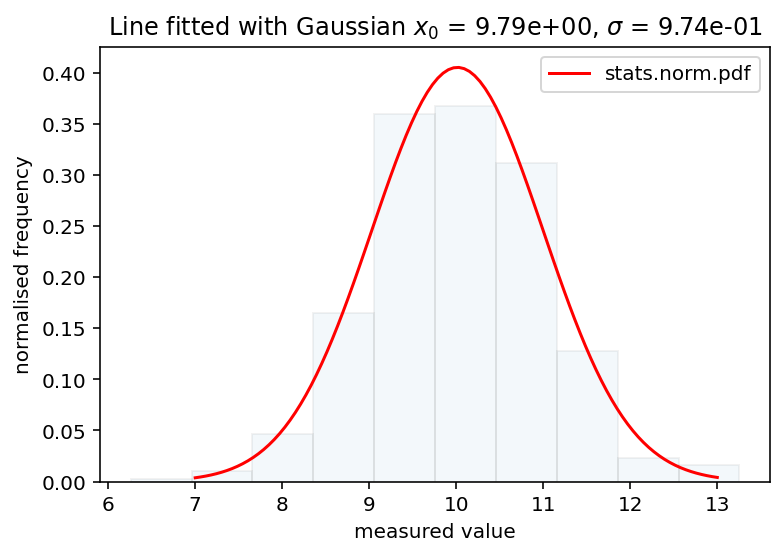

In [20]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#check if function exists
assert "plot_gaussian" in dir(), 'Make sure you define your function and use the specified function name.'

#check output format of function
tnp=987
tmean=10
tstdev=1
tbins=15
outputpg=plot_gaussian(tnp,tmean,tstdev,tbins);
new_x0, new_sigma = stats.norm.fit(outputpg[0]);
assert len(outputpg)==2, 'Your function should return two outputs.'
assert (type(outputpg[0])==np.ndarray)&(type(outputpg[1])==np.ndarray), 'Your outputs should be numpy arrays.'

#check if generated data not used for plotting line
tfit=stats.norm.pdf(outputpg[0],new_x0,new_sigma);
if len(outputpg[1])==len(tfit):
    assert all(outputpg[1]!=tfit), 'Remeber to use np.linspace to generate and plot the Gaussian fit - do not use your random data as x-coordinate on the plot!'
#check if uses stats.norm.fit()
assert (tmean!=new_x0) & (tstdev!=new_sigma), 'Remember to recalculate your mean and st.dev. with the numpy norm.fit().'

#check if arguments used in the function
outx=plot_gaussian(tnp,2,3,4);
assert all(outx[0]!=outputpg[0]), 'Make sure your function arguments are used within the function and not set to default'
plt.close()
print("\n \n**********")
print('Well done! All test passed. You can move to the next part of the task.\n**********')

array([0.00409289, 0.00491081, 0.00587045, 0.00699172, 0.00829645,
       0.00980834, 0.01155298, 0.01355775, 0.01585172, 0.01846546,
       0.02143084, 0.02478068, 0.02854843, 0.03276774, 0.03747192,
       0.04269337, 0.04846297, 0.05480937, 0.0617582 , 0.06933134,
       0.07754605, 0.08641415, 0.09594121, 0.10612572, 0.11695834,
       0.12842124, 0.14048749, 0.15312058, 0.16627409, 0.17989153,
       0.19390633, 0.20824202, 0.22281266, 0.23752344, 0.2522715 ,
       0.266947  , 0.28143429, 0.29561338, 0.30936151, 0.32255487,
       0.33507038, 0.34678762, 0.35759073, 0.36737029, 0.37602519,
       0.38346432, 0.38960821, 0.39439041, 0.39775873, 0.39967613,
       0.40012144, 0.39908972, 0.3965924 , 0.392657  , 0.38732669,
       0.38065945, 0.37272706, 0.3636138 , 0.35341494, 0.34223511,
       0.33018652, 0.31738708, 0.30395848, 0.2900243 , 0.27570817,
       0.26113195, 0.24641407, 0.23166803, 0.21700104, 0.20251288,
       0.18829492, 0.1744294 , 0.16098888, 0.14803594, 0.13562

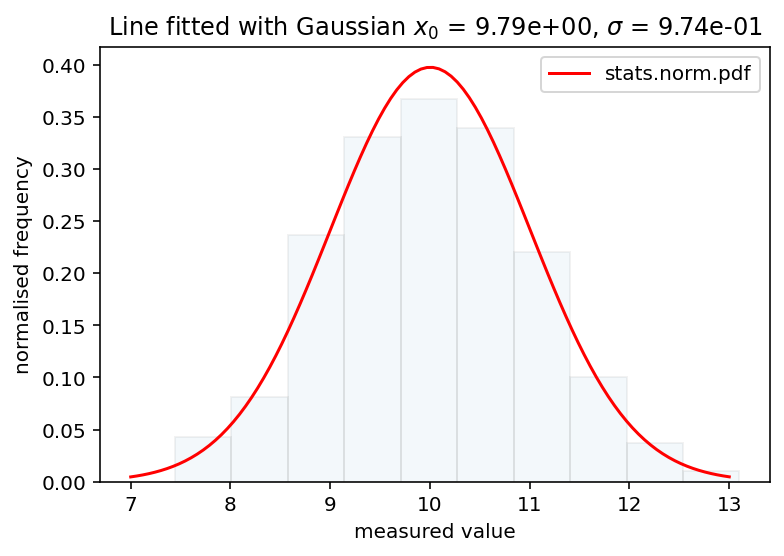

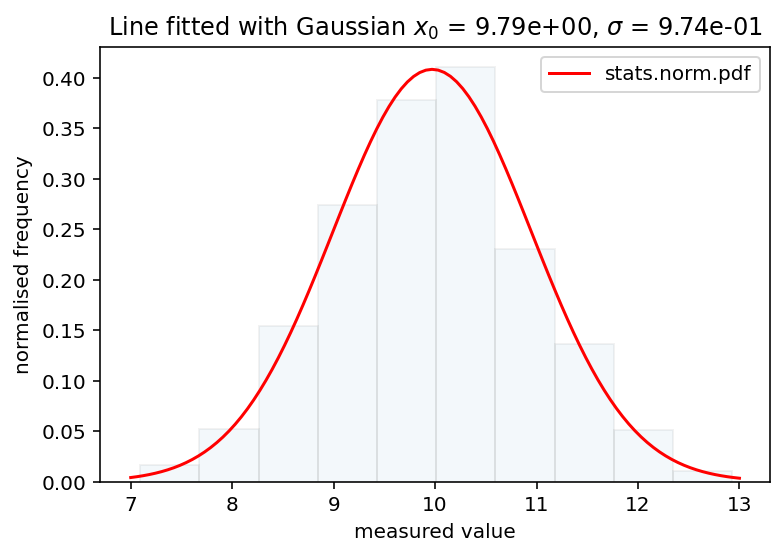

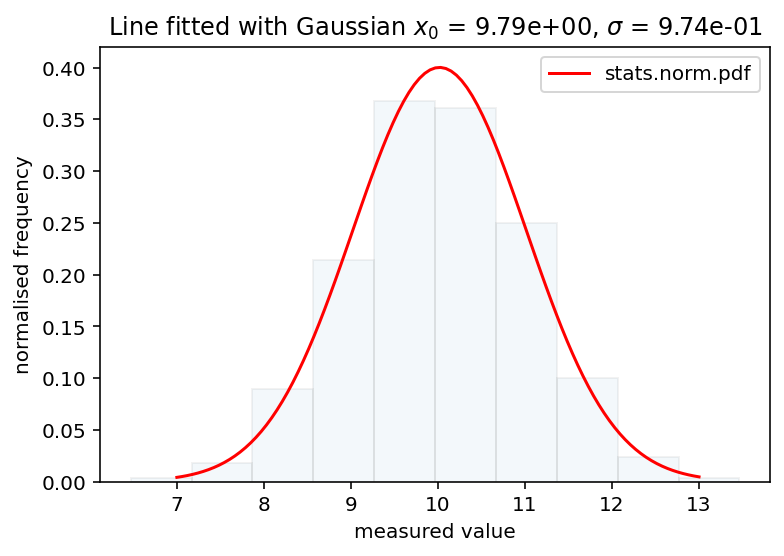

In [21]:
#plot with number points = 1000, number of bins = 15 
output=plot_gaussian(1000, 10, 1, 15);
output[1]

#plot with number points = 1500, number of bins = 20 
output_one = plot_gaussian(1500,10,1,20);
output_one[1]

#plot with number points = 3000, number of bins = 30 
output_two = plot_gaussian(3000,10,1,30);
output_two[1]



 **Task 5**: Exploring Gaussian
<div class="alert alert-success"> 
    Use your function <tt>plot_gaussian</tt> to produce different plots. Experiment with the number of points and number of bins. Do more bins always give better results?
    
Use further text and code cells to demonstrate your results for two or three different scenarios (i.e. vary the bin ranges and/or the number of data points).
</div>

## When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-info"><b>Residual</b>: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 

# **Bonus task** (optional and not marked)
<div class="alert alert-success">
How could you modify your plot_gaussian function so that it can also take a real dataset as an input instead of generating randomized values?

<em>HINT: Python functions can have optional arguments. These must always come at the end of the list of arguments in the function definition and have a default value assigned to them. Try adding an optional argument, e.g. filename to your function and using conditional statements to plot the data and omit random generation if the filename is provided. For more info on optional arguments, see the bonus notebook in the assignment folder. </em>
</div>

Quality of plots

General quality of code comments and docstrings

General quality of text cells